# Введение #

Пока что в этом курсе мы изучали, как нейронные сети решают задачи регрессии. Теперь мы применим нейронные сети к другой распространенной задаче машинного обучения: классификации. Почти все, что мы изучили до сих пор, по‑прежнему применимо. Главное отличие — в функции потерь, которую мы используем, и в том, какие выходы мы хотим получить на последнем слое.

# Бинарная классификация #

Классификация на два класса — распространенная задача машинного обучения. Вы можете захотеть предсказать, будет ли клиент делать покупку, была ли транзакция по кредитной карте мошеннической, показывают ли сигналы из глубокого космоса наличие новой планеты или есть ли по результатам медицинского теста признаки заболевания. Все это — задачи **бинарной классификации**.

В исходных данных классы могут быть представлены строками вроде `"Yes"` и `"No"`, или `"Dog"` и `"Cat"`. Прежде чем использовать эти данные, мы назначим **метку класса**: один класс будет `0`, а другой — `1`. Назначение числовых меток приводит данные в форму, пригодную для нейронной сети.

# Точность и кросс-энтропия #

**Точность** — одна из многих метрик, используемых для оценки успеха в задачах классификации. Точность — это отношение числа правильных предсказаний к общему числу предсказаний: `accuracy = number_correct / total`. Модель, которая всегда предсказывает правильно, имеет показатель точности `1.0`. При прочих равных, точность — разумная метрика, когда классы в наборе данных встречаются примерно с одинаковой частотой.

Проблема с точностью (и большинством других метрик классификации) в том, что ее нельзя использовать как функцию потерь. SGD нужна функция потерь, которая меняется плавно, а точность, будучи отношением счетчиков, меняется «скачками». Поэтому мы должны выбрать замену, которая будет выступать в роли функции потерь. Этой заменой является функция *кросс‑энтропии*.

Теперь вспомним, что функция потерь определяет *цель* сети во время обучения. В регрессии наша цель — минимизировать расстояние между ожидаемым результатом и предсказанным. Мы выбрали MAE для измерения этого расстояния.

Для классификации нам вместо этого нужна мера расстояния между *вероятностями*, и это дает кросс‑энтропия. **Кросс‑энтропия** — это своего рода мера расстояния от одного распределения вероятностей к другому.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/DwVV9bR.png" width="400" alt="Графики точности и кросс-энтропии.">
<figcaption style="textalign: center; font-style: italic"><center>Кросс‑энтропия сильнее штрафует неверные вероятностные предсказания.</center></figcaption>
</figure>

Идея в том, что мы хотим, чтобы сеть предсказывала правильный класс с вероятностью `1.0`. Чем дальше предсказанная вероятность от `1.0`, тем больше будет потеря кросс‑энтропии.

Технические причины использования кросс‑энтропии немного тонкие, но главное, что нужно вынести из этого раздела, — используйте кросс‑энтропию как функцию потерь для классификации; другие метрики, которые вас могут интересовать (например, точность), как правило будут улучшаться вместе с ней.

# Получение вероятностей с помощью сигмоидной функции #

Функции кросс‑энтропии и точности обе требуют на вход вероятности, то есть числа от 0 до 1. Чтобы преобразовать вещественные значения, выдаваемые плотным слоем, в вероятности, мы добавляем новый тип функции активации — **сигмоидную активацию**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/FYbRvJo.png" width="400" alt="График сигмоиды — S-образная кривая с горизонтальными асимптотами на 0 слева и 1 справа. ">
<figcaption style="textalign: center; font-style: italic"><center>Сигмоидная функция отображает вещественные числа в интервал $[0, 1]$.</center></figcaption>
</figure>

Чтобы получить окончательное предсказание класса, мы задаем *порог* вероятности. Обычно это 0.5, так что округление дает правильный класс: ниже 0.5 — класс с меткой 0, а 0.5 или выше — класс с меткой 1. Порог 0.5 Keras использует по умолчанию в своей [метрике точности](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).

# Пример — бинарная классификация #

Теперь попробуем на практике!

Набор данных [Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere) содержит признаки, полученные из радиолокационных сигналов, направленных на ионосферный слой атмосферы Земли. Задача — определить, показывает ли сигнал наличие какого‑то объекта, или это просто пустой воздух.

In [1]:

import pandas as pd
from IPython.display import display

ion = pd.read_csv('../dataset/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


Мы определим модель так же, как делали для задач регрессии, с одним исключением. В последнем слое добавьте активацию `'sigmoid'`, чтобы модель выдавала вероятности классов.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Добавьте в модель функцию потерь кросс‑энтропии и метрику точности с помощью метода `compile`. Для задач с двумя классами обязательно используйте `'binary'` версии. (Для задач с большим числом классов все будет немного иначе.) Оптимизатор Adam отлично подходит и для классификации, поэтому мы останемся на нем.

In [3]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

В этой конкретной задаче обучение модели может занять довольно много эпох, поэтому для удобства мы добавим колбэк ранней остановки.

In [4]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Как обычно, мы посмотрим кривые обучения, а также проверим лучшие значения потерь и точности на валидационном наборе. (Помните, что ранняя остановка восстановит веса, соответствующие этим значениям.)

Best Validation Loss: 0.4200
Best Validation Accuracy: 0.8857


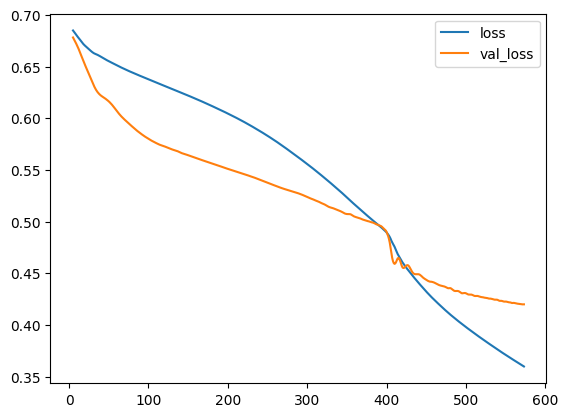

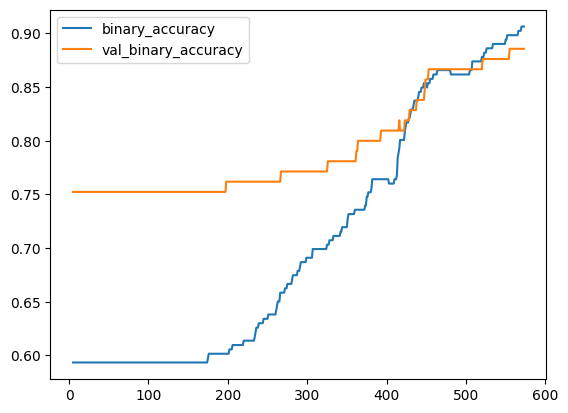

In [5]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

# Ваша очередь #

Используйте нейронную сеть, чтобы [**предсказать отмены бронирований отелей**](https://www.kaggle.com/kernels/fork/11887335) на наборе данных *Hotel Cancellations*.

---



*Есть вопросы или комментарии? Посетите [форум обсуждений курса](https://www.kaggle.com/learn/intro-to-deep-learning/discussion), чтобы пообщаться с другими учащимися.*